# Part 1 Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Import methods for regression diagnostic plots from 'statsmodels'
from statsmodels.api import ProbPlot, qqplot

In [2]:
# Load the Dataset and study the data.

df=pd.read_csv(r"C:\Users\pc\Downloads\day (2).csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
# Look at the specifics of the data frame
df.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspee

In [4]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
# converting the qualitative varialbes to 'category' datatypes.

columnNames = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

for columnName in columnNames:
    df[columnName] = df[columnName].astype('category')


In [6]:
df.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [7]:
# Checking if there are any null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Drop the column which are not useful in the analysis.
df.drop(['instant'], axis=1, inplace=True)

In [9]:
df.drop(['dteday'], axis=1, inplace=True)
df.shape

(730, 14)

In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Now Lets Split the data into input and output (for Linear regression model)
X = df.drop(labels = 'cnt', axis = 1)
y = df['cnt']

# Now 'cnt' will be the target/output variable.

In [12]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432


In [13]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

In [14]:
# Split the data into training and testing datasets
# Check the number of observations in the train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Training dataset size: ', len(X_train))
print('Testing dataset size: ', len(X_test))

Training dataset size:  584
Testing dataset size:  146


# Part 2 Exploratory Data Analysis

In [15]:
# Create graphs for categorical variaables with 'cnt' on y axis.

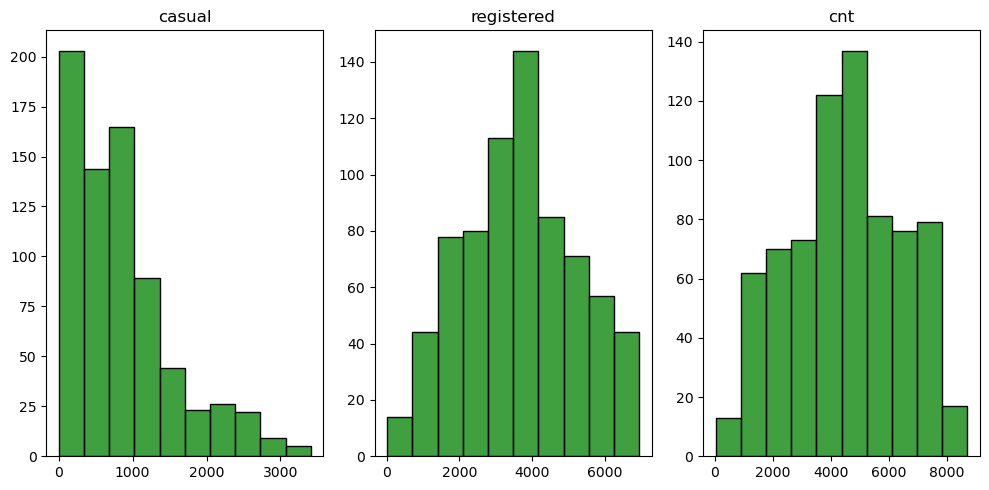

In [16]:
columns = ['casual', 'registered', 'cnt']
fig, ax = plt.subplots(1, 3, figsize=(10,5))
for i, ax in enumerate(ax):
    sns.histplot(x=df[columns[i]], ax=ax, bins=10, color='green')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

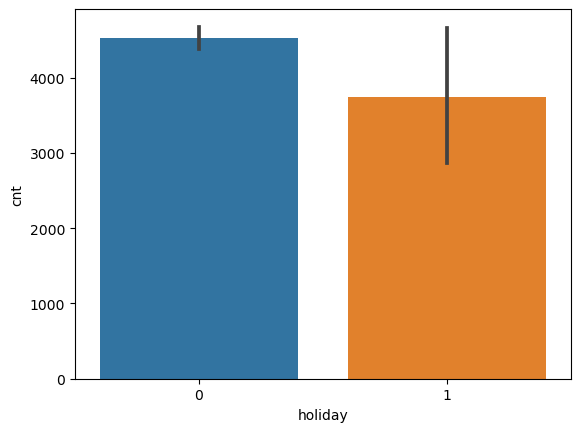

In [17]:
sns.barplot(data=df,x='holiday',y='cnt')
plt.show()

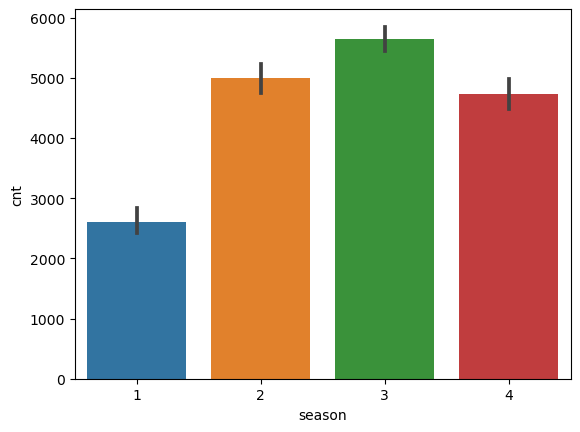

In [18]:
sns.barplot(data=df,x='season',y='cnt')
plt.show()

In [19]:
# converting discrete variable "season" to bins
df = pd.get_dummies(df, columns=['season'], dtype=int)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0


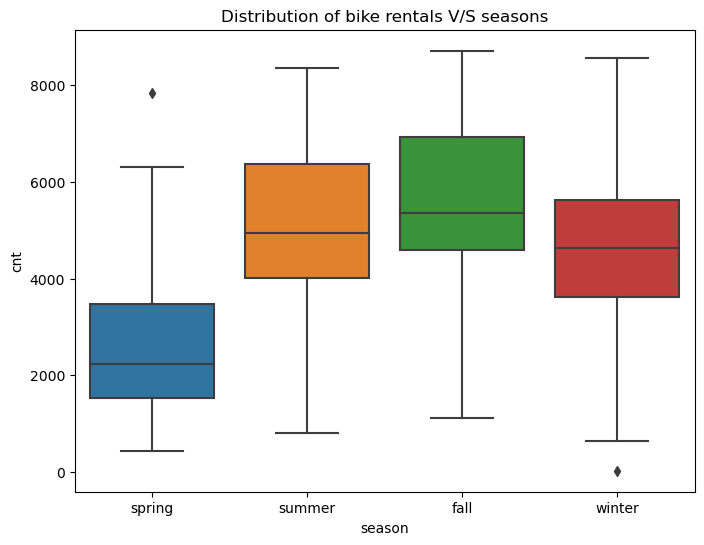

In [20]:
df['season'] = df[['season_1', 'season_2', 'season_3', 'season_4']].idxmax(axis=1)
df['season'] = df['season'].map({'season_1': 'spring', 'season_2': 'summer', 'season_3': 'fall', 'season_4': 'winter'})
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='season', y='cnt')
plt.title('Distribution of bike rentals V/S seasons')
plt.show()

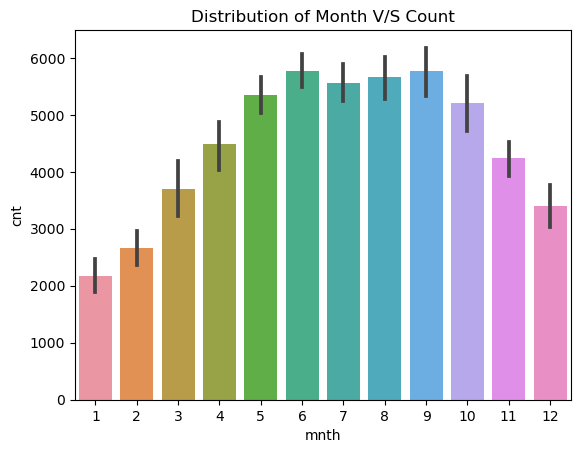

In [21]:
sns.barplot(data=df,x='mnth',y='cnt')
plt.title('Distribution of Month V/S Count')
plt.show()

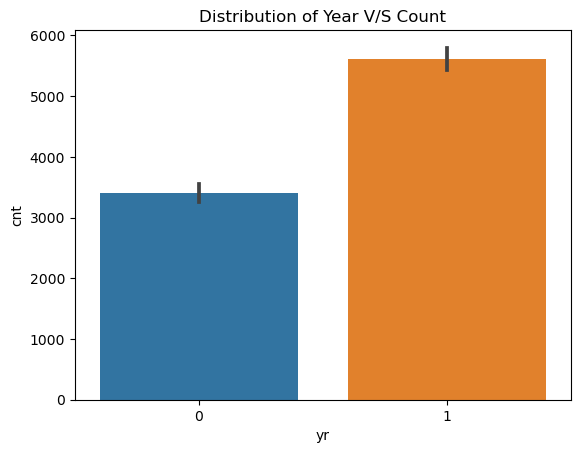

In [22]:
sns.barplot(data=df,x='yr',y='cnt')
plt.title('Distribution of Year V/S Count')
plt.show()

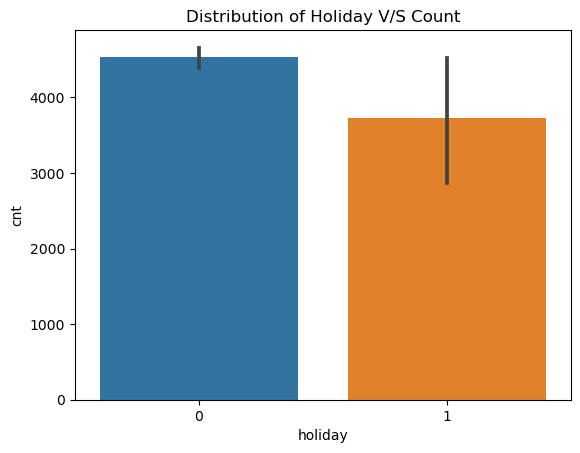

In [23]:
sns.barplot(data=df,x='holiday',y='cnt')
plt.title('Distribution of Holiday V/S Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

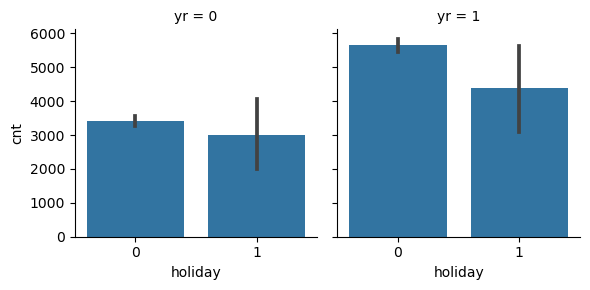

In [24]:
plt.figure(figsize=(12,6))
s = sns.FacetGrid(df, col="yr")
s. map(sns.barplot, "holiday", "cnt")

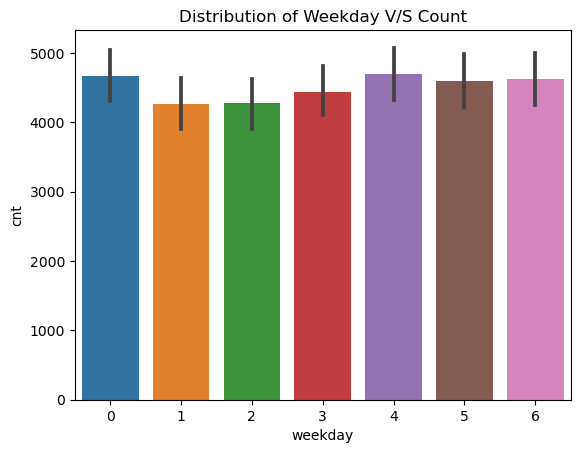

In [25]:

sns.barplot(data=df,x='weekday',y='cnt')
plt.title('Distribution of Weekday V/S Count')
plt.show()

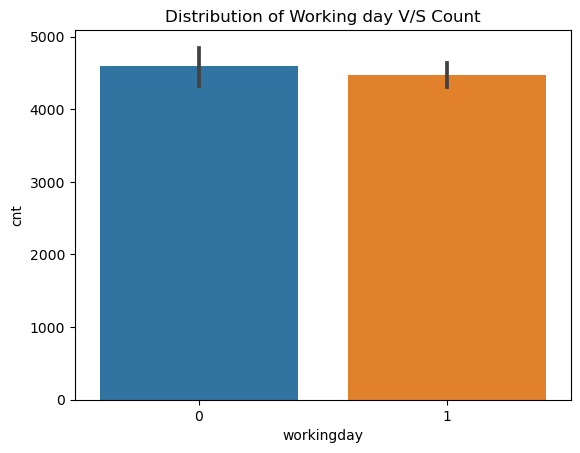

In [26]:
sns.barplot(data=df ,x= 'workingday',y= 'cnt')
plt.title('Distribution of Working day V/S Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

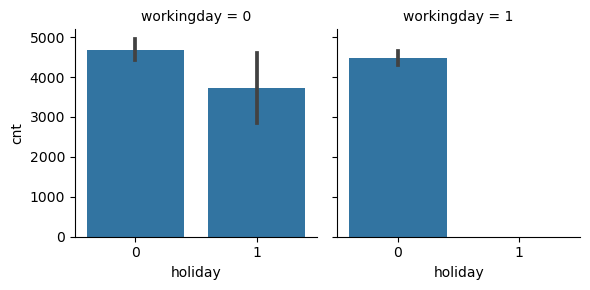

In [27]:
plt.figure(figsize=(12,6))
s = sns.FacetGrid(df, col="workingday")
s. map(sns.barplot, "holiday", "cnt")

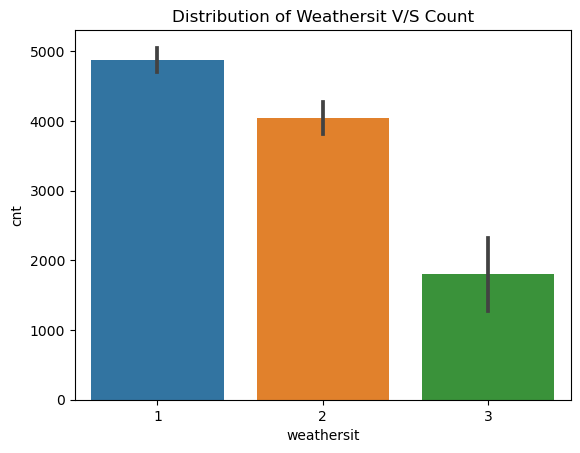

In [28]:
sns.barplot(data=df,x='weathersit',y='cnt')
plt.title('Distribution of Weathersit V/S Count')
plt.show()

<Figure size 600x600 with 0 Axes>

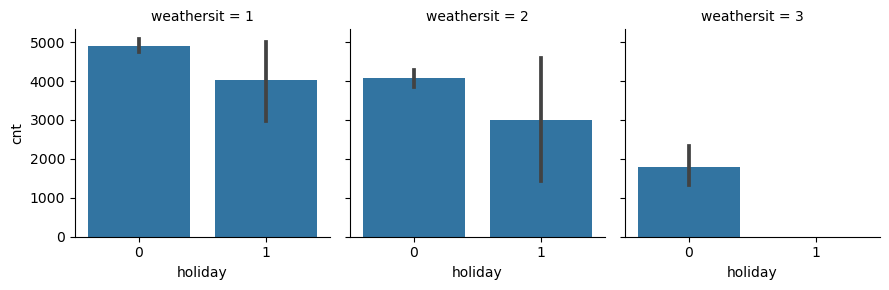

In [29]:
plt.figure(figsize=(6,6))
s = sns.FacetGrid(df, col="weathersit")
s. map(sns.barplot, "holiday", "cnt")

# Assignment-based Subjective Questions

1:From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable? (6 marks) 

Solution: 1. Season: The demand of bike is less in the spring season when compared with other seasons.
          2. year: The Bike demand in year 2019 is higher as compared to 2018.
          3. Month: The month bar plots indicates that more bikes are on rent during may to october.
          4.Holiday and workingday: The working day and holiday bar plots indicate that more bikes are on rent during normal working days than on weekends or holidays.
          5.WEathersit: The weathersit bar plot shows that more bikes are on rent during clear while it is low when there are Few clouds and Partly cloudy.
          6.Weekdays: There is no significant change in the weekdays on the demand of bike.
          

In [30]:
# Create graphs for numerical variaables with 'cnt' on y axis.

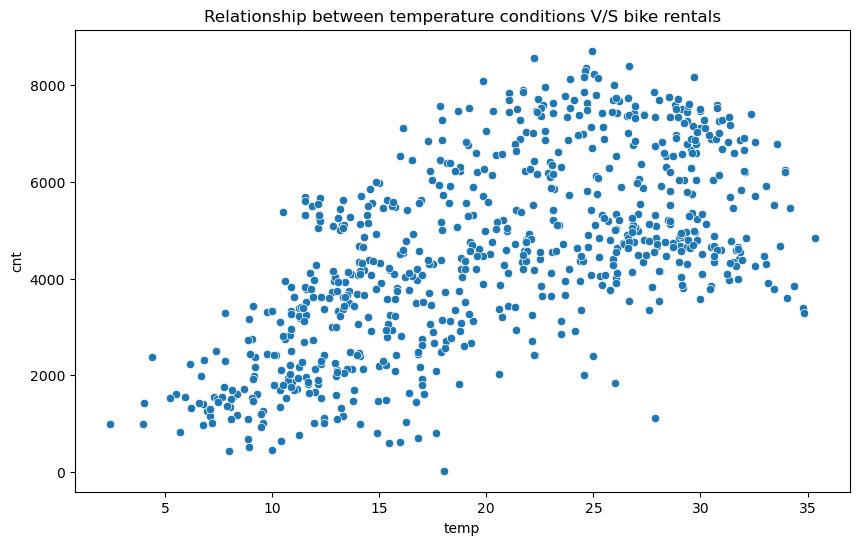

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Relationship between temperature conditions V/S bike rentals')
plt.show()

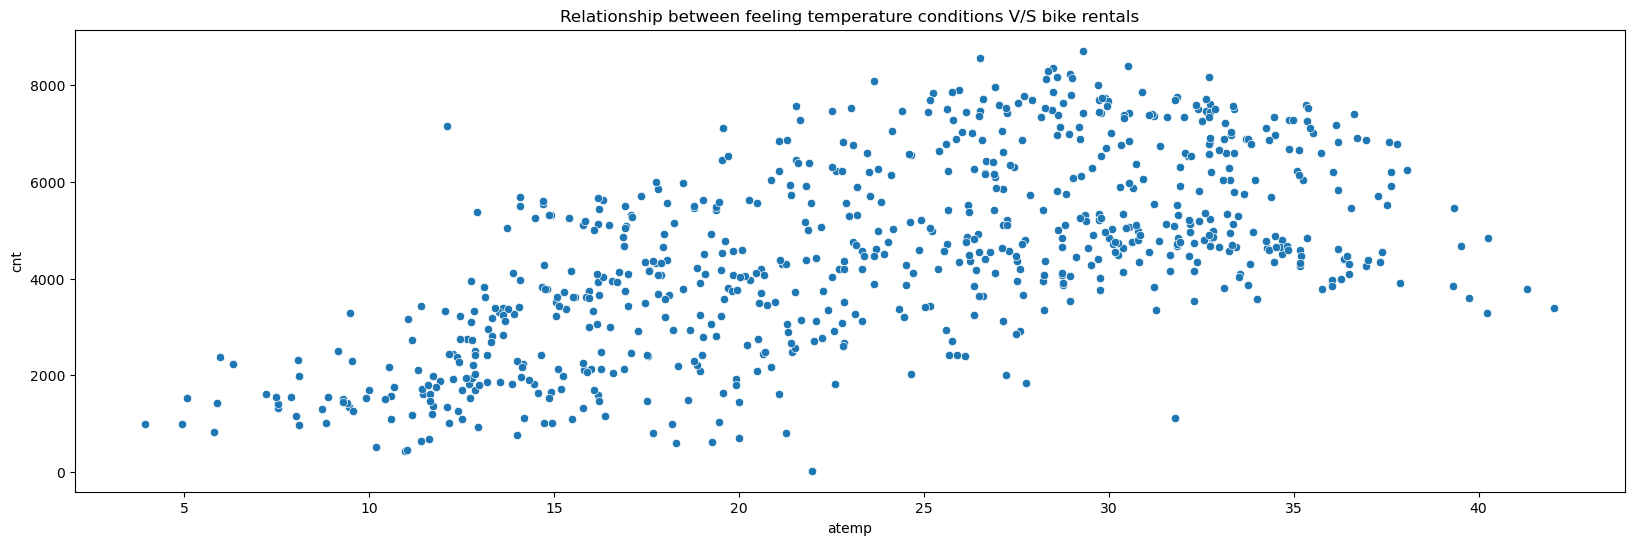

In [32]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='atemp', y='cnt', data=df)
plt.title('Relationship between feeling temperature conditions V/S bike rentals')
plt.show()

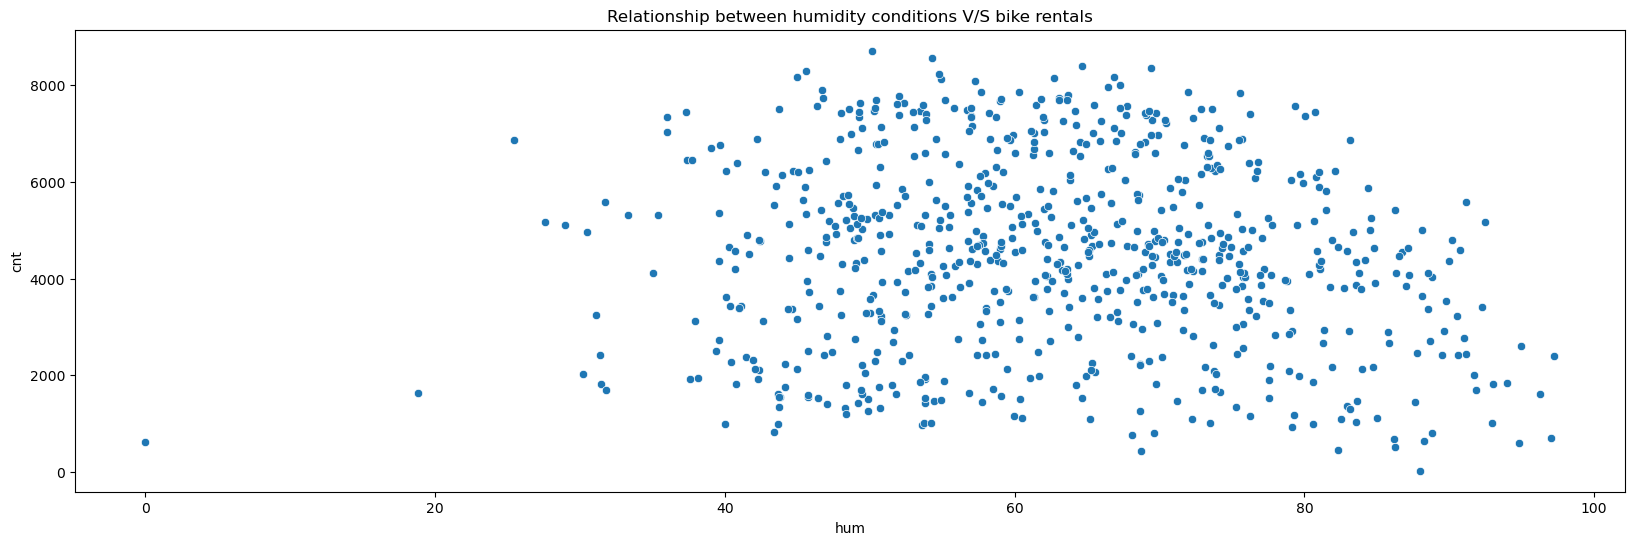

In [33]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='hum', y='cnt', data=df)
plt.title('Relationship between humidity conditions V/S bike rentals')
plt.show()

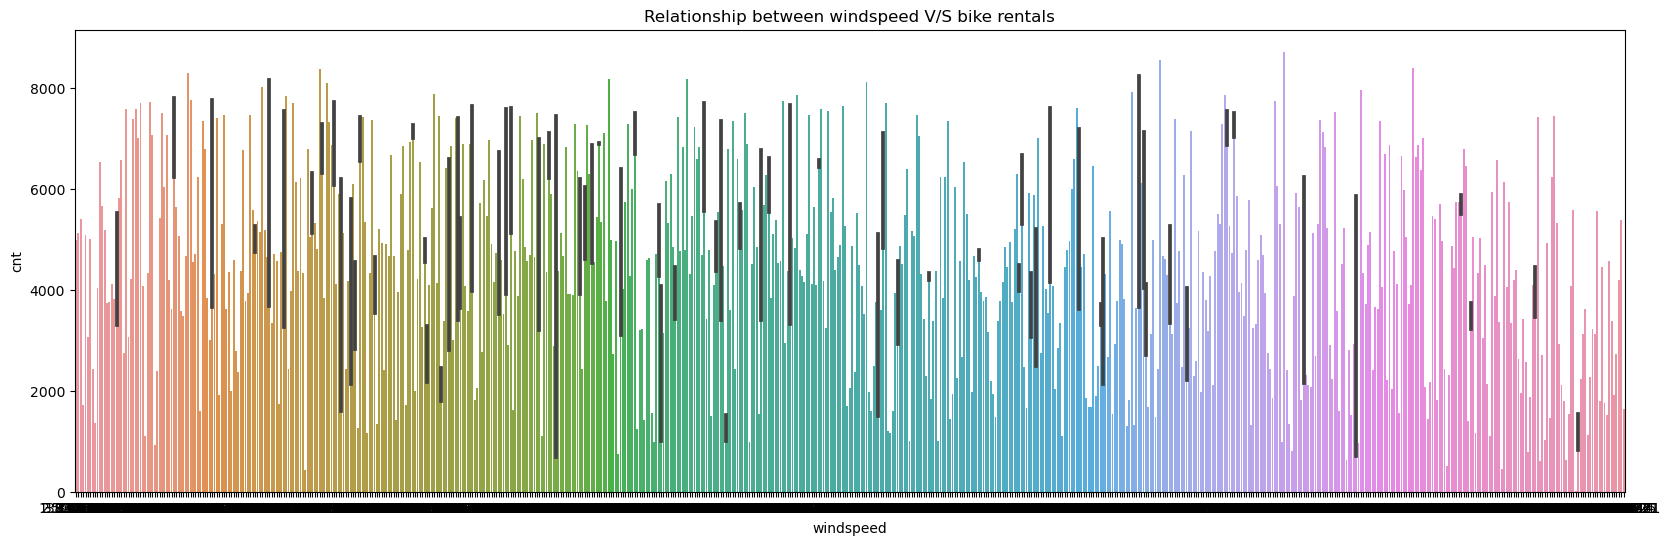

In [34]:
plt.figure(figsize=(20,6))
sns.barplot(x='windspeed', y='cnt', data=df)
plt.title('Relationship between windspeed V/S bike rentals')
plt.show()

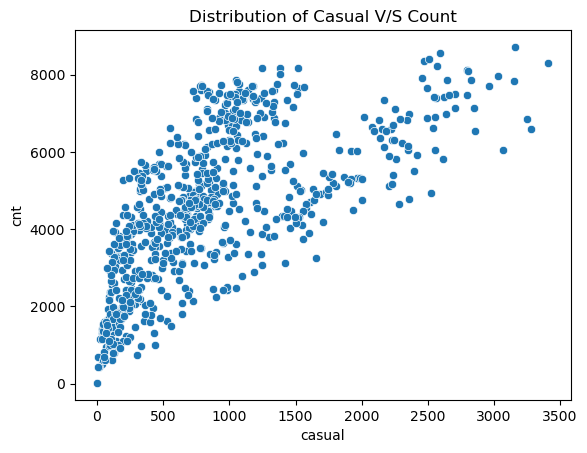

In [35]:
sns.scatterplot(x=df['casual'], y=df['cnt'])
plt.title('Distribution of Casual V/S Count')
plt.show()

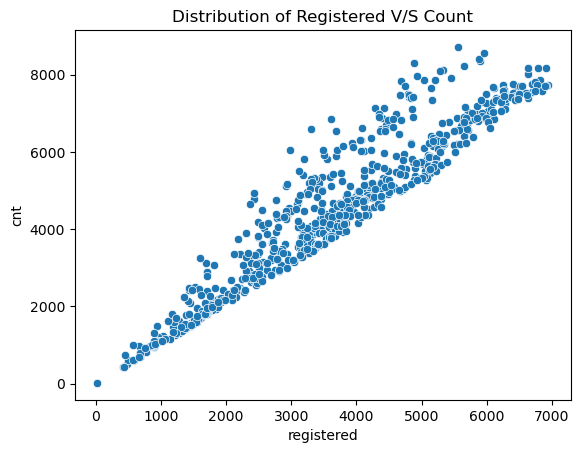

In [36]:
sns.scatterplot(x=df['registered'], y=df['cnt'])
plt.title('Distribution of Registered V/S Count')
plt.show()

In [37]:
# Calculate correlation coefficients
df.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,-0.619408,0.154876,0.678283,-0.225590
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,-0.624772,0.163151,0.655757,-0.205634
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543,-0.184884,-0.002870,0.024134,0.163908
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132,0.178880,0.097421,-0.139886,-0.135612
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123,-0.427653,0.217350,0.303368,-0.099446
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411,-0.508980,0.084721,0.295832,0.123975
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000,-0.561702,0.145325,0.345908,0.064619
season_1,-0.619408,-0.624772,-0.184884,0.178880,-0.427653,-0.508980,-0.561702,1.000000,-0.332099,-0.336926,-0.324859
season_2,0.154876,0.163151,-0.002870,0.097421,0.217350,0.084721,0.145325,-0.332099,1.000000,-0.341894,-0.329650
season_3,0.678283,0.655757,0.024134,-0.139886,0.303368,0.295832,0.345908,-0.336926,-0.341894,1.000000,-0.334441


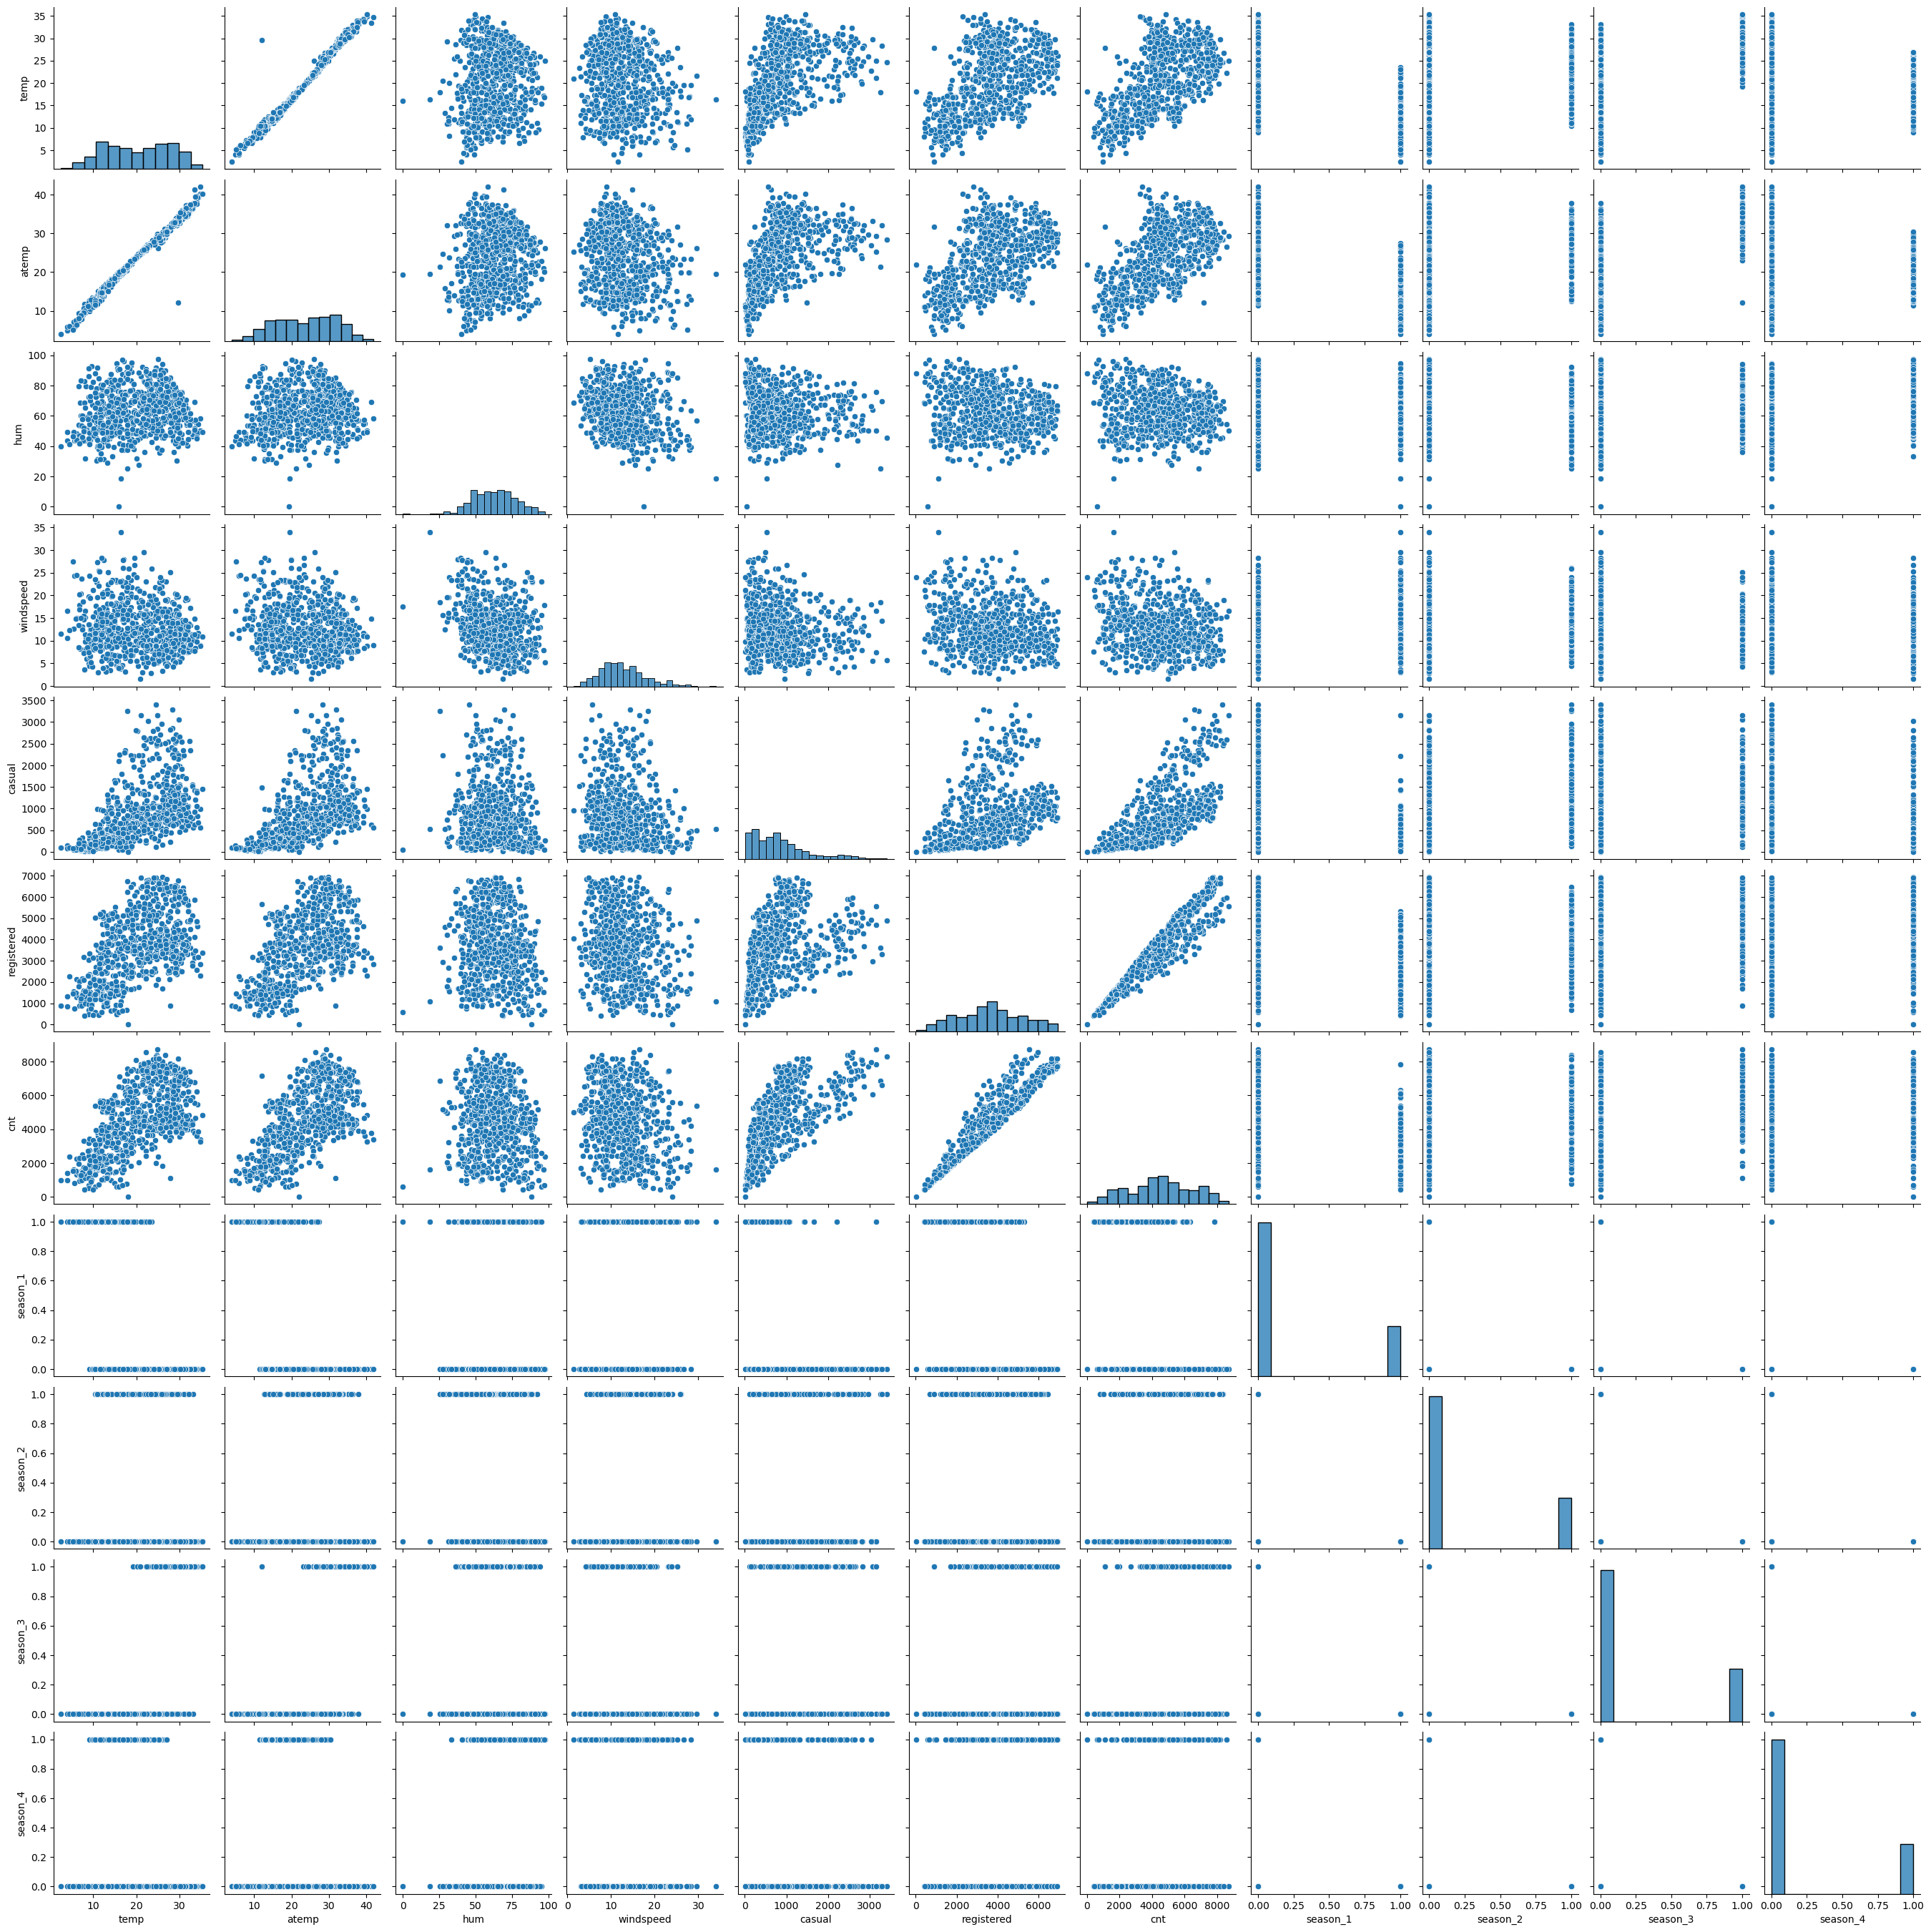

In [38]:
# Creating a pair plot for the numerical features in the data set
sns.pairplot(df);

# Part 3 Simple linear regression model

# Model 1

In [39]:
# Create and train a linear regression model for the data and view its summary
lr_model_1 = smf.ols('cnt ~ casual', data = df)
lr_model_1 = lr_model_1.fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     599.9
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           4.27e-97
Time:                        20:03:20   Log-Likelihood:                -6340.9
No. Observations:                 730   AIC:                         1.269e+04
Df Residuals:                     728   BIC:                         1.269e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2898.2348     84.491     34.302      0.0

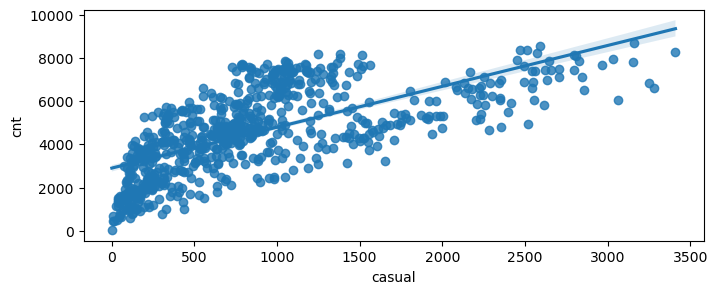

In [40]:
# Create a regression plot for this model
plt.figure(figsize = (8, 3))
sns.regplot(data = df, x = 'casual', y = 'cnt');

In [41]:
# Look at the residual standard error for the model
print(np.round(np.sqrt(np.sum(lr_model_1.resid**2)/lr_model_1.df_resid), 2))

1434.48


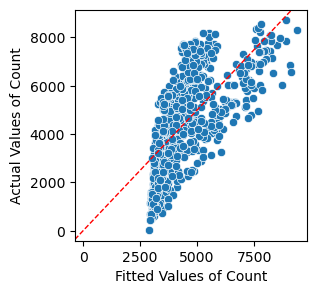

In [42]:
# Create a scatter plot between the fitted and actual values of 'price'
plt.figure(figsize = (3, 3))
sns.scatterplot(x = lr_model_1.fittedvalues, y = df['cnt'])
plt.axline((100,100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Count')
plt.ylabel('Actual Values of Count');

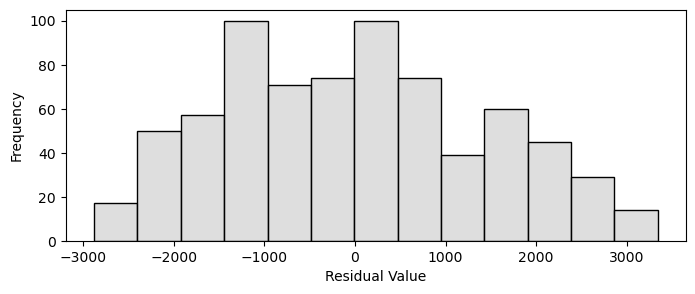

In [43]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 3))
sns.histplot(data = df, x = lr_model_1.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

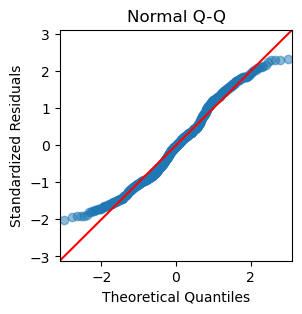

In [44]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_1.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(3, 3)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

In [45]:
lr_model_1 = LinearRegression()
lr_model_1 = lr_model_1.fit(X = X_train[['casual']], y = y_train)

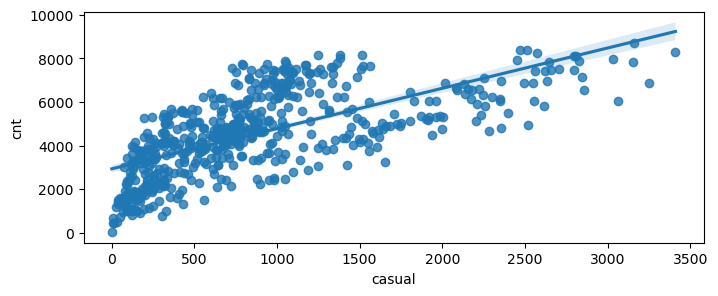

In [46]:
# Create a regression plot for this model
plt.figure(figsize = (8, 3))
sns.regplot(x = X_train[['casual']], y = y_train);

In [47]:
# Look at the intercept and coefficient values
print('Intercept: ', lr_model_1.intercept_)
print('Coefficient: ', lr_model_1.coef_[0])

Intercept:  2927.522881226938
Coefficient:  1.8494128496917532


In [48]:
# Obtain predictions on the testing set
lr_model_1.predict(X_test[['casual']])

array([7399.40315178, 4321.98016989, 3338.09253386, 3014.44528516,
       3378.77961655, 3195.68774443, 3371.38196515, 3946.54936141,
       7051.71353604, 2997.80056952, 3014.44528516, 3118.01240475,
       3149.45242319, 4338.62488554, 4310.8836928 , 4220.26246316,
       4906.3946304 , 7162.67830702, 3129.10888184, 3669.13743395,
       5577.73149484, 3221.57952433, 3789.34926918, 5640.61153172,
       3290.00779977, 4825.02046501, 3966.89290275, 4199.91892181,
       4778.78514377, 7539.95852836, 3027.39117511, 4375.61314254,
       4370.06490399, 6223.17657938, 3228.97717573, 4360.81783974,
       5255.93365899, 5152.36653941, 3711.6739295 , 3105.0665148 ,
       3149.45242319, 3169.79596454, 4135.18947208, 3382.47844225,
       4745.49571247, 4490.27673922, 3378.77961655, 5213.39716345,
       3637.69741551, 3800.44574628, 4555.00618896, 5035.85352988,
       4135.18947208, 5109.83004386, 4405.20374813, 4425.54728948,
       3275.21249697, 4791.73103372, 4717.75451973, 3186.44068

In [49]:
# Look at the general predictive performance of the model
pd.DataFrame(index = X_test.index,
             data = {'Truths': y_test,
                     'Predictions': lr_model_1.predict(X_test[['casual']])}).head()

,Truths,Predictions
196,5923,7399.403152
187,4592,4321.980170
14,1248,3338.092534
31,1360,3014.445285
390,4075,3378.779617


# Model 2

In [50]:

# Create and train a linear regression model for the data and view its summary
lr_model_2 = smf.ols('cnt ~ registered', data = df)
lr_model_2 = lr_model_2.fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     6127.
Date:                Fri, 12 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:03:23   Log-Likelihood:                -5741.8
No. Observations:                 730   AIC:                         1.149e+04
Df Residuals:                     728   BIC:                         1.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    214.5743     59.620      3.599      0.0

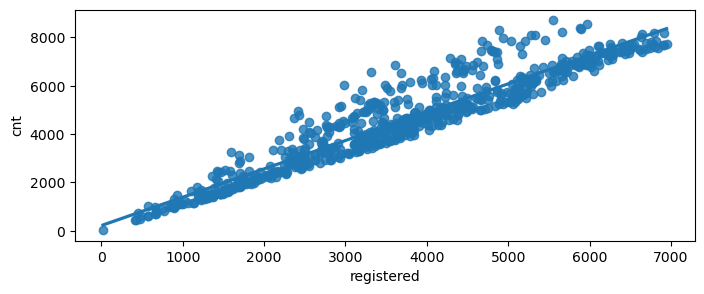

In [51]:
# Create a regression plot for this model
plt.figure(figsize = (8, 3))
sns.regplot(data = df, x = 'registered', y = 'cnt');

In [52]:
# It looks as though the bike 'registered' is explaining the variation in count well.

In [53]:
# Obtain predictions on the testing set
lr_model_2.predict(X_test[['registered']])

196    4327.577402
187    4718.342032
14     1418.551817
31     1755.336949
390    4710.127761
          ...     
118    4576.352482
566    3963.802520
688    6199.257840
266    4494.209767
504    5407.167372
Length: 146, dtype: float64

In [54]:
# Look at the residual standard error for the model
print(np.round(np.sqrt(np.sum(lr_model_2.resid**2)/lr_model_2.df_resid), 2))

631.34


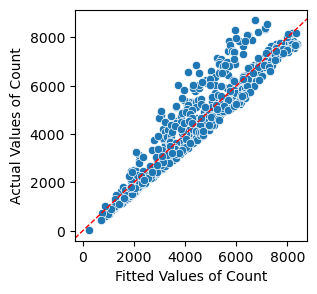

In [55]:
# Create a scatter plot between the fitted and actual values of 'Count'
plt.figure(figsize = (3, 3))
sns.scatterplot(x = lr_model_2.fittedvalues, y = df['cnt'])
plt.axline((100,100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Count')
plt.ylabel('Actual Values of Count');

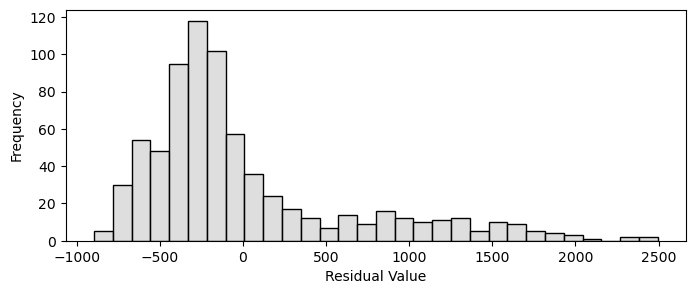

In [56]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 3))
sns.histplot(data = df, x = lr_model_2.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

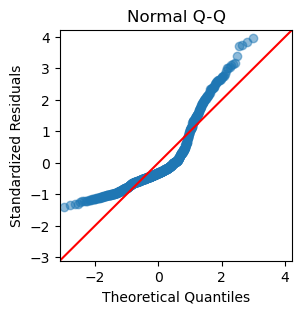

In [57]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_2.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(3, 3)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

In [58]:
lr_model_2 = LinearRegression()
lr_model_2 = lr_model_2.fit(X = X_train[['registered']], y = y_train)

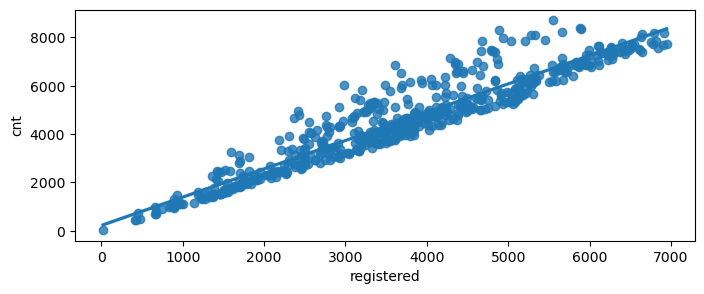

In [59]:
# Create a regression plot for this model
plt.figure(figsize = (8, 3))
sns.regplot(x = X_train[['registered']], y = y_train);

In [60]:
# Look at the intercept and coefficient values
print('Intercept: ', lr_model_2.intercept_)
print('Coefficient: ', lr_model_2.coef_[0])

Intercept:  218.97991959174033
Coefficient:  1.172018563989937


In [61]:
# Obtain predictions on the testing set
lr_model_2.predict(X_test[['registered']])

array([4326.90498638, 4717.18716819, 1421.47096625, 1757.84029411,
       4708.98303824, 2178.59495858, 3054.09282588, 7315.55232455,
       3663.54247916, 1542.18887834, 1966.4595985 , 1460.14757886,
       1790.6568139 , 4989.09547503, 4431.21463857, 4099.53338496,
       8067.98824263, 5565.72860851, 4047.96456815, 2183.28303284,
       7153.81376272, 1604.30586223, 6336.91682362, 3726.83148161,
       2306.34498206, 6669.77009579, 3529.93236286, 5340.70104423,
       7760.91937887, 6251.35946845, 1119.09017674, 5296.1643388 ,
       8318.80021533, 4227.28340844, 2616.92990152, 4025.69621543,
       6835.02471331, 4284.71231807, 2938.06298805, 3521.72823292,
       1282.00075713, 1004.23235746, 5125.04962845, 4017.49208548,
       7576.91246432, 8063.30016838, 2219.61560832, 2697.79918243,
       3088.08136424, 1650.01458622, 5918.50619627, 7780.84369445,
       6181.03835461, 7465.57070074, 4645.69403578, 2868.91389277,
       4233.14350126, 7838.27260409, 7541.7519074 , 3889.74206

In [62]:
# Look at the general predictive performance of the model
pd.DataFrame(index = X_test.index,
             data = {'Truths': y_test,
                     'Predictions': lr_model_2.predict(X_test[['registered']])}).head()

,Truths,Predictions
196,5923,4326.904986
187,4592,4717.187168
14,1248,1421.470966
31,1360,1757.840294
390,4075,4708.983038


# END